# Задача

Построение SVM и выбор оптимального ядра.

**Цель**: Выберите любой понравившийся вам датасет по задаче классификации (https://archive.ics.uci.edu/ml/datasets.php?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) и повторите вычисления из урока.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder

# Описание выборки

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.


Source: http://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

Attributes:
* 	1. Age(numerical)
* 	2. Blood Pressure(numerical)
* 	3. Specific Gravity(nominal)
* 	4. Albumin(nominal)
* 	5. Sugar(nominal)
* 	6. Red Blood Cells(nominal)
* 	7. Pus Cell (nominal)
* 	8. Pus Cell clumps(nominal)
* 	9. Bacteria(nominal)
* 	10. Blood Glucose Random(numerical)		
* 	11. Blood Urea(numerical)	
* 	12. Serum Creatinine(numerical)	
* 	13. Sodium(numerical)
* 	14. Potassium(numerical)	
* 	15. Hemoglobin(numerical)
* 	16. Packed  Cell Volume(numerical)
* 	17. White Blood Cell Count(numerical)
* 	18. Red Blood Cell Count(numerical)	
* 	19. Hypertension(nominal)	
* 	20. Diabetes Mellitus(nominal)	
* 	21. Coronary Artery Disease(nominal)
* 	22. Appetite(nominal)	
* 	23. Pedal Edema(nominal)
* 	24. Anemia(nominal)
* 	25. Class (nominal)		

In [140]:
attr_names = ["age", "blood pressure", "specific gravity", "albumin", "sugar", "red blood cells", "pus cell", "pus cell clumps", "bacteria", "blood glucose random", "blood urea", "serum creatinine", "sodium",
              "potassium", "hemoglobin", "packed cell volume", "white blood cell count", "red blood cell count", "hypertension", "diabetes mellitus", "coronary artery disease", "appetite", "pedal edema", "anemia", "class"]
df = pd.read_csv(
    "datasets/09/Chronic_Kidney_Disease/chronic_kidney_disease_full.arff", sep=",", names=attr_names, na_values="?")

In [141]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age                        391 non-null float64
blood pressure             388 non-null float64
specific gravity           353 non-null float64
albumin                    354 non-null float64
sugar                      351 non-null float64
red blood cells            248 non-null object
pus cell                   335 non-null object
pus cell clumps            396 non-null object
bacteria                   396 non-null object
blood glucose random       356 non-null float64
blood urea                 381 non-null float64
serum creatinine           383 non-null float64
sodium                     313 non-null float64
potassium                  312 non-null float64
hemoglobin                 348 non-null float64
packed cell volume         329 non-null float64
white blood cell count     294 non-null float64
red blood cell count       269 non-null float64
hypertension               398 non-

In [142]:
df.head(3)

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd


In [143]:
df.describe(include=["O"]).T

,count,unique,top,freq
red blood cells,248,2,normal,201
pus cell,335,2,normal,259
pus cell clumps,396,2,notpresent,354
bacteria,396,2,notpresent,374
hypertension,398,2,no,251
diabetes mellitus,398,3,no,261
coronary artery disease,398,2,no,364
appetite,399,2,good,317
pedal edema,399,2,no,323
anemia,399,2,no,339


In [144]:
df.describe(exclude=["O"]).T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood glucose random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


# Preprocessing

## Обрабатываем пропуски

In [145]:
# Формируем списки числовых и стринговых колонок
objCols = list(df.select_dtypes(include="object").columns)
numCols = df.select_dtypes(include=["float16", "float32", "float64", "int16", "int32", "int64"]).columns

In [146]:
# Список пропущенных значений
(df.isna().sum()/df.shape[0]).to_frame("missings").reset_index(
).sort_values(by="missings", ascending=False).head(10)

,index,missings
5,red blood cells,0.3800
17,red blood cell count,0.3275
16,white blood cell count,0.2650
13,potassium,0.2200
12,sodium,0.2175
15,packed cell volume,0.1775
6,pus cell,0.1625
14,hemoglobin,0.1300
4,sugar,0.1225
2,specific gravity,0.1175


In [147]:
df[objCols] = df[objCols].fillna("other")
df[numCols] = df[numCols].fillna(df[numCols].mean())

# EDA

## Распределение классов

In [148]:
df["class"].unique()

array(['ckd', 'notckd'], dtype=object)

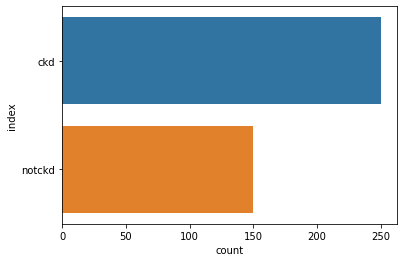

In [149]:
sns.barplot(data=df["class"].value_counts().to_frame("count").reset_index(), x="count", y="index")
plt.show()

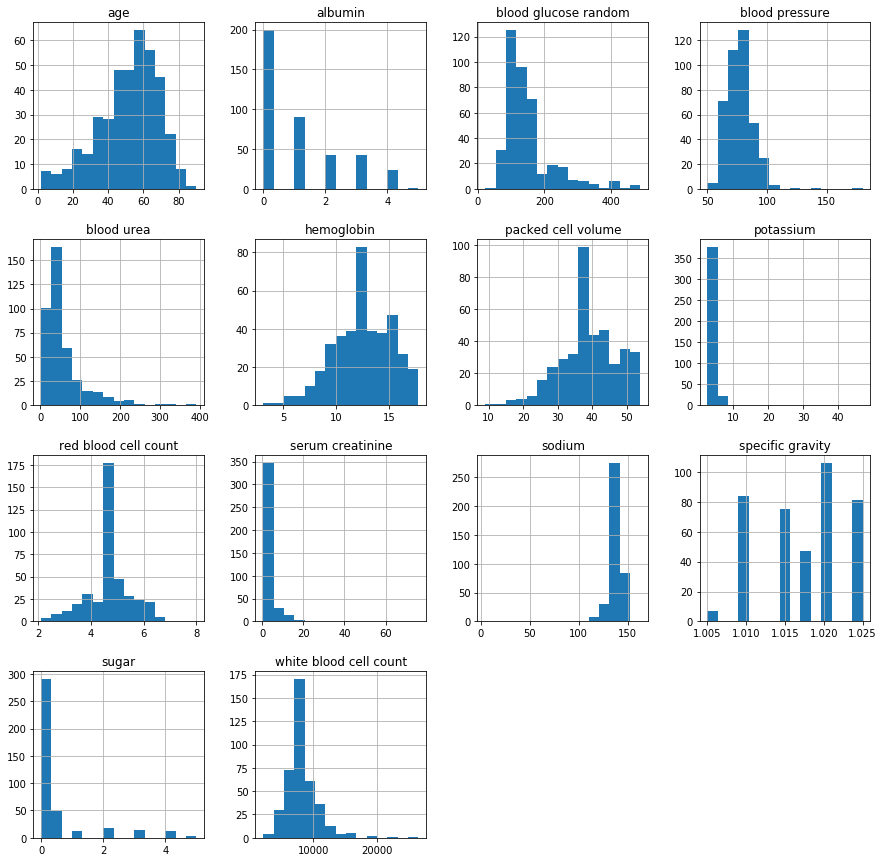

In [13]:
df[numCols].hist(figsize=(15,15), bins=15)
plt.show()

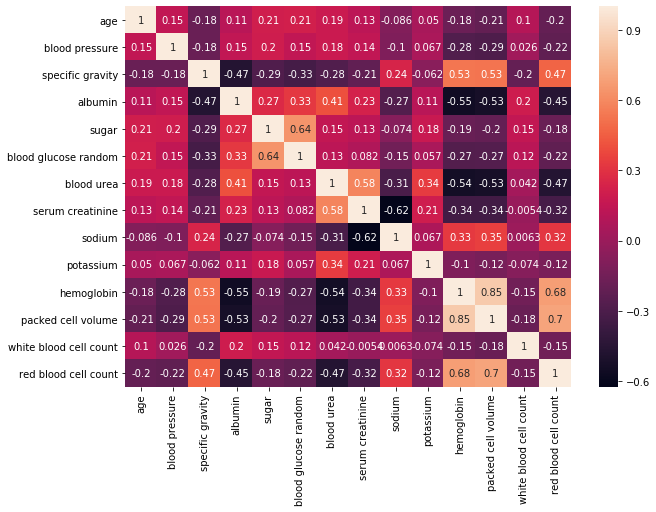

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numCols].corr(), annot=True)
plt.show()

In [15]:
# Находим пары признаков с корреляцией больше 0.6
CorField = []
Corr = df[numCols].corr()

for i in Corr:
    for j in Corr.index[Corr[i] > 0.4]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, Corr[i][Corr.index == j].values[0])

specific gravity hemoglobin 0.5317553611445416
specific gravity packed cell volume 0.5284371831343737
specific gravity red blood cell count 0.4669755746286559
albumin blood urea 0.4057784640750812
sugar blood glucose random 0.6391860141277351


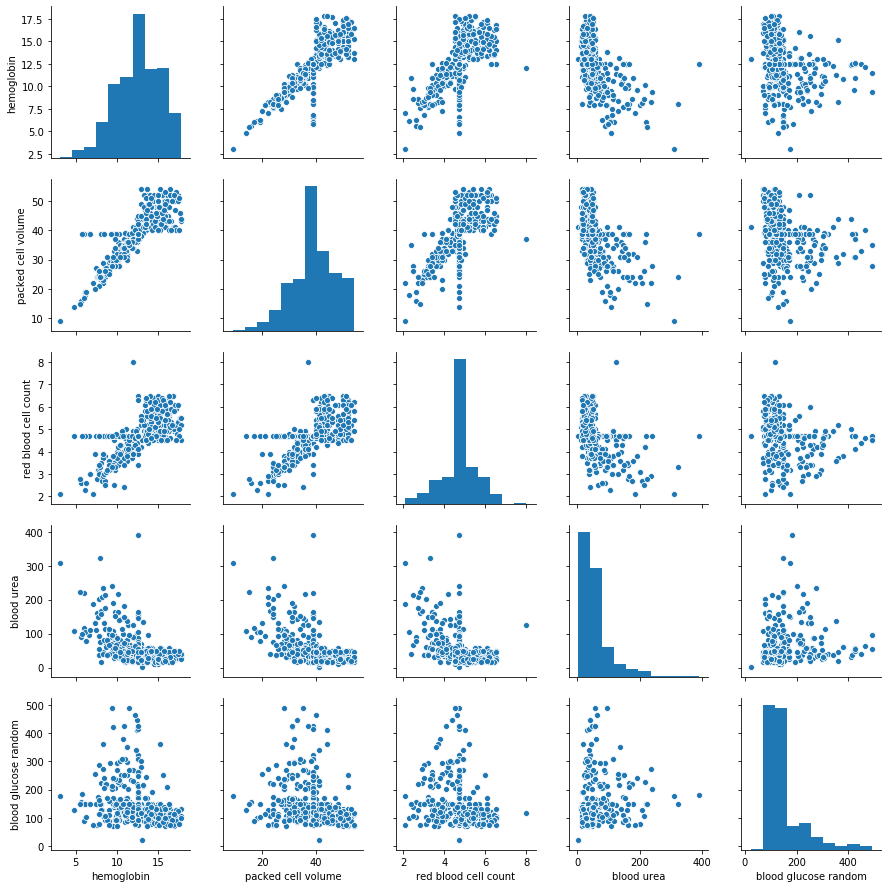

In [19]:
sns.pairplot(data=df[CorField])
plt.show()

In [23]:
X = df[numCols]
X_scaled = (X - X.mean()) / (X.std())
y = df["class"]

In [24]:
data=pd.concat([X_scaled, y], axis=1)

In [25]:
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')

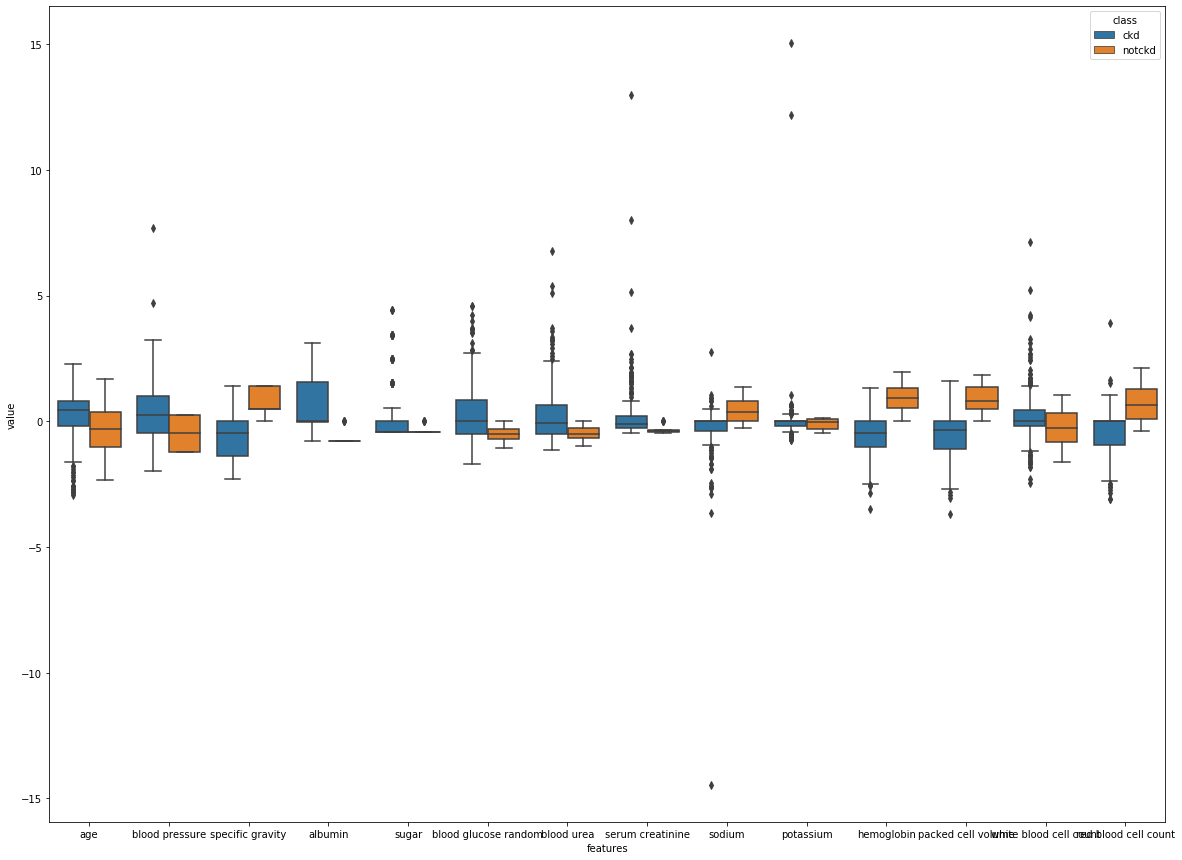

In [27]:
plt.figure(figsize=(20,15))
sns.boxplot(x="features", y="value", hue="class", data=data)
plt.show()

# Feature engineeniring

## Переводим категориальные колонки в dummy

In [150]:
class OneHotEncodingDf(OneHotEncoder):
    """DataFrame Wrapper around OneHotEncoding"""
    def __init__(self, drop=None, sparse=False, handle_unknown='ignore'):
        super(OneHotEncodingDf, self).__init__(drop=drop,
                                               sparse=sparse,
                                               handle_unknown=handle_unknown
                                              )

    def transform(self, X, y=None):
        z = super(OneHotEncodingDf, self).transform(X.values)
        return pd.DataFrame(z, index=X.index, columns=self.get_feature_names())

In [151]:
ohe_df = OneHotEncodingDf()

In [152]:
df_encoded = ohe_df.fit_transform(df[objCols])

In [153]:
data =  pd.concat([df[numCols], df_encoded, df["class"]], axis=1)

# Моделирование

In [154]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [156]:
data["class"] = data["class"].apply(lambda x: 1 if x=="ckd" else 0)

In [157]:
X = data.drop("class", axis=1)
y = data['class']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [159]:
df["class"].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [160]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((360, 47), (40, 47), (360,), (40,))

In [161]:
scaler = StandardScaler()
cls_lr = LogisticRegression()
cls_svm = svm.SVC()

In [162]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
cls_lr.fit(X_train_scaled, y_train)
cls_svm.fit(X_test_scaled, y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [164]:
def model_metrics(pred, actual):
    print("acc: {}, \npre: {}, \nrecall: {}".format(accuracy_score(pred, actual), 
                                                        precision_score(pred, actual), 
                                                        recall_score(pred, actual))
         )

In [165]:
model_metrics(cls_lr.predict(X_test), y_test)

acc: 0.6, 
pre: 1.0, 
recall: 0.6


In [166]:
model_metrics(cls_svm.predict(X_test), y_test)

acc: 0.6, 
pre: 1.0, 
recall: 0.6


**В заключении**: 